In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

### Carga dos dados

In [2]:
# Abrir o datasets
df_pontuacao = pd.read_csv('.\dataset\pontuacao_estudantes.csv')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_9804\1920446103.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_pontuacao = pd.read_csv('.\dataset\pontuacao_estudantes.csv')


In [3]:
# Checar estrutura do dataset
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [4]:
# Visualizar topo do DF
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [5]:
# Visualizar final do DF
df_pontuacao.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


### EDA

In [6]:
# Medidas estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

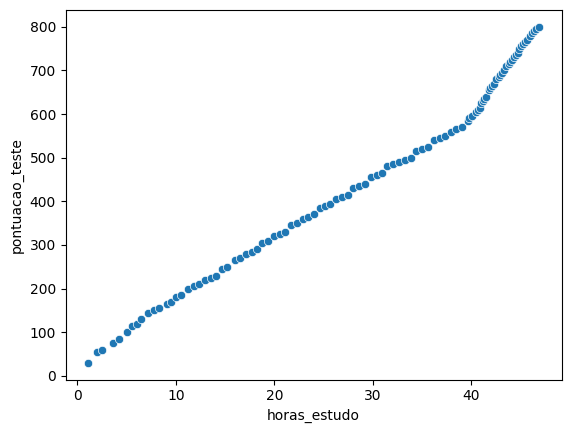

In [7]:
# Plot de Disperção (scatter)
# X = horas_estudos
# Y = pontuação_teste
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

horas_estudo          Axes(0.125,0.11;0.352273x0.77)
pontuacao_teste    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

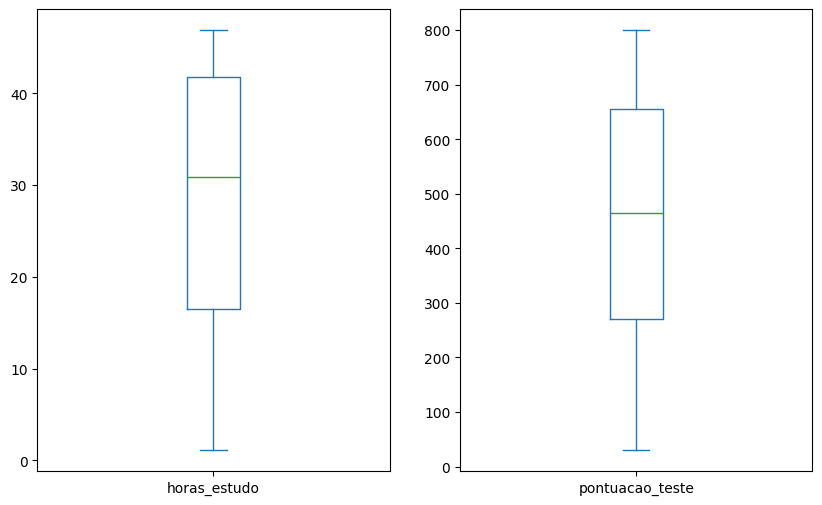

In [8]:
# Verificar se temos Outliers
# Plot Box
df_pontuacao.plot.box(figsize=(10,6), subplots=True)

- Correlação (heatmap)

<Axes: >

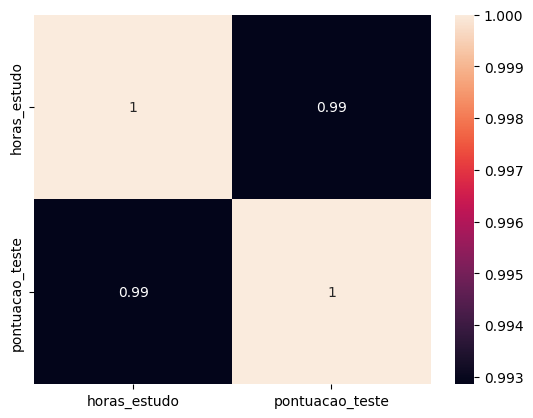

In [9]:
# Verifiar Corralação - Pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

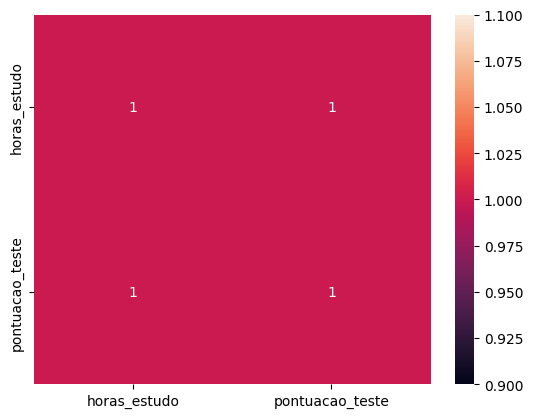

In [10]:
# Verifiar Corralação - Spearman
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

- Histograma das variáveis

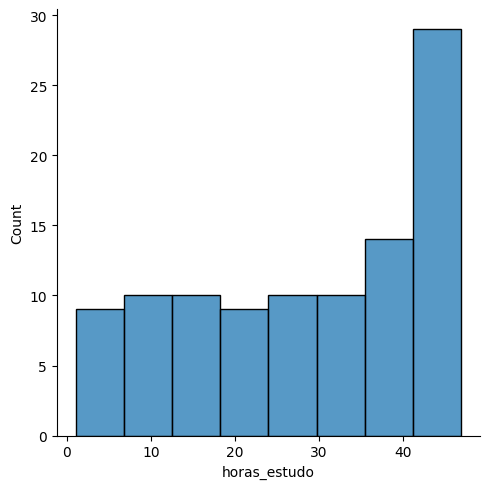

In [11]:

sns.displot(df_pontuacao, x='horas_estudo')

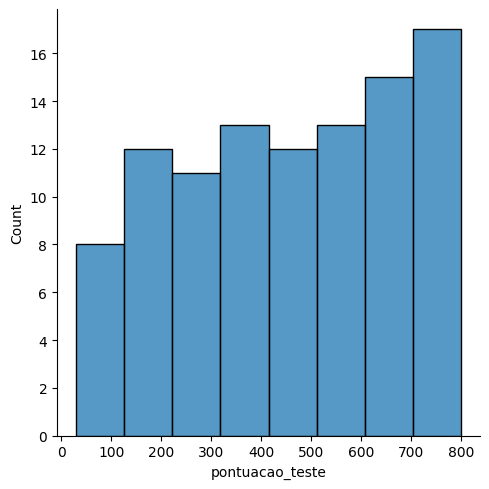

In [12]:
sns.displot(df_pontuacao, x='pontuacao_teste')

### Treinar Modelo


In [13]:
# Dividir dataset entre treino e teste
# Quando temos apenas uma feature, precisa ajustar o shape
X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)


In [15]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [16]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Imprimir a equação da reta
# y = aX + b
print("A equação da reta é y = {:.4f}X + {:.4f}".format(reg_model.coef_[0][0], (reg_model.intercept_[0])))


A equação da reta é y = 15.6426X + 8.4766


### Validar Modelo - Métricas

In [18]:
# Predição dos valores com base no conjunto de teste
y_pred = reg_model.predict(X_test)

In [19]:
# Calcular métrica R² (Coeficiente de Determinação)
# R² representa a proporção na variação na variável dependente que é explicada pela variável independente
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = round(r2_score(y_test, y_pred), 3)
r2

0.983

In [20]:
# Calcular métrica MAE (Mean Absolute Error)
# MAE = Média (y_test - y_pred)
# É uma métrica fácil de interpretar
# MAE é menos sensível a outliers
mae = round(mean_absolute_error(y_test, y_pred), 2)
print(f" O resíduo no conjunto de teste é {mae}")

 O resíduo no conjunto de teste é 22.96


In [21]:
# Calcular métrica MSE (Mean Squared Error)
# MSE = Média (y_test, y_pred)²
# Não é uma métrica fácil de interpretar
# MSE é mais sensível a outliers e penaliza grandes erros
mse = mean_squared_error(y_test, y_pred)
round(mse, 2)


np.float64(767.0)

In [22]:
# Calcular métrica RMSE (Squared Root Mean Squared Error)
# MSE = Raiz (Média (y_test, y_pred)²)
# É uma métrica fácil de interpretar
# MSE é mais sensível a outliers e penaliza grandes erros
rmse = mean_squared_error(y_test, y_pred, squared=False)
round(rmse, 2)


c:\Users\HP\.virtualenvs\regressao_linear_simples-PDQ44Lci\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(27.69)

### Análise Gráfica

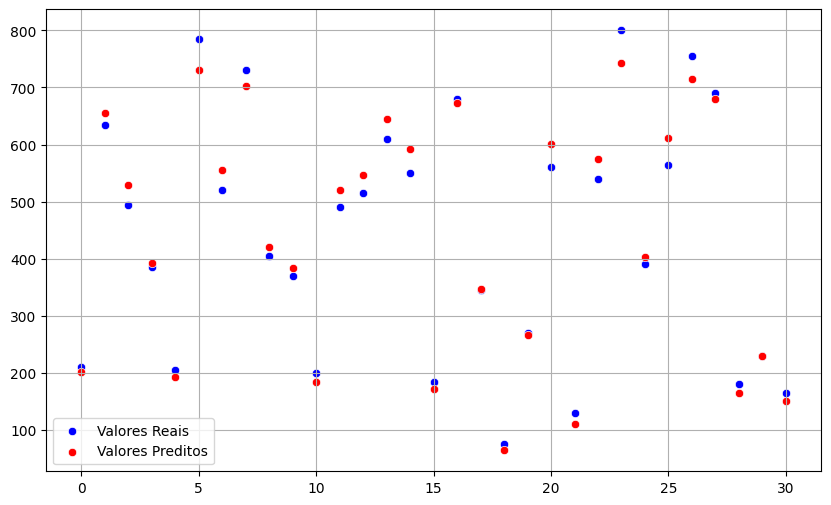

In [23]:
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')
plt.grid()
plt.legend()
plt.show()

### Análise de Resíduos

In [24]:
# Calculars resíduos
residuos = y_test - y_pred

In [25]:
# Calcular os resíduos padronizados (standardization)
# Para cada elemento de um conjunto (X - média) / desvio_padroa
from scipy.stats import zscore
residuos_std = zscore(residuos)

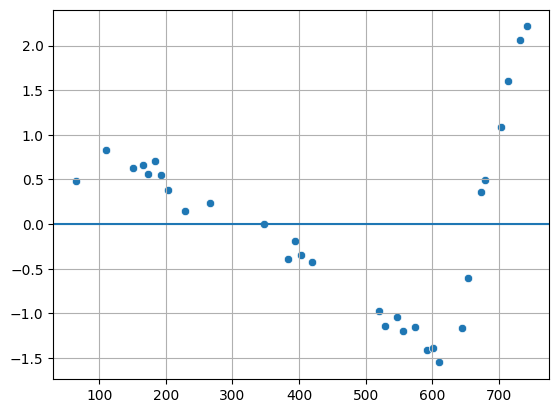

In [26]:
# Verificar linearidade do modelo:
# Se os resíduos estiverem entre -2 e +2 (na escala padrão) - indica linearidade

# Verificar homogenidade das variâncias (Homocedasticidade)
# Se os valores estiverem em torno da reta, temos homocedasticidade, caso contrário
# se tivermos alguma tendência ou padrão (formam um cone, funil), 
# há heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)
plt.grid()

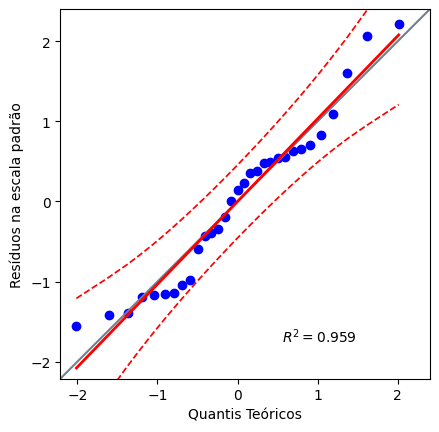

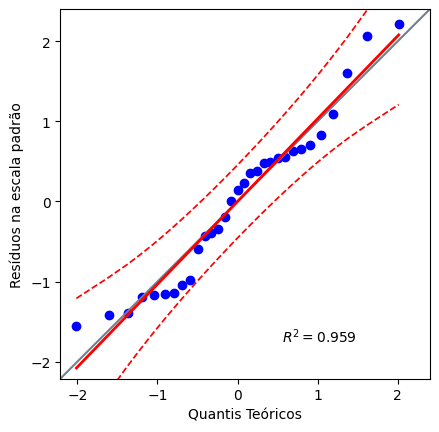

In [27]:
# Checar se resíduos seguem uma distribuição normal
#QQ (Quantile-Quantile) Plot, que avalia se uma amostra segue um distribuição normal
import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show(0)

In [28]:
# Teste de Normalidade - Shapiro Wilk
# H0 - Dados seguem uma distribuição normal
# H1 - Dados não seguem uma distribuição normal
# Se o p-value > 0.05 não rejeita H0, caso contrário sejeitamos
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print("Estatística do teste: {:.2f}\nP-valor: {:.2f}".format(stat_shapiro, p_valor_shapiro))

Estatística do teste: 0.95
P-valor: 0.16


In [29]:
# Teste de Normalidade - Kolmogorov-Smirnov
# H0 - Dados seguem uma distribuição normal
# H1 - Dados não seguem uma distribuição normal
# Se o p-value > 0.05 não rejeita H0, caso contrário sejeitamos
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatística do teste: {:.2f}\nP-valor: {:.2f}".format(stat_ks, p_valor_ks))

Estatística do teste: 0.48
P-valor: 0.00


### Fazer Predições com o Modelo


In [30]:
# Se eu estudar 30.4 horas, qual a pontuação previsata pelo modelo?
horas = float(input('Quantas horas de estudo você quer prever? '))
previsão = reg_model.predict([[horas]]).reshape(-1)[0]
print("O modelo fez uma previsão de {:.2f} pontos para {} horas de estudo\nPorém a mediana de horas de estudo é {} e a pontuação mediana é {}\nNo final temos um ruído ou erro de previsão de {}".format(previsão, horas, round(df_pontuacao.horas_estudo.median(), 2), round(df_pontuacao.pontuacao_teste.median(), 2), round(previsão - df_pontuacao.pontuacao_teste.median(), 2)))

O modelo fez uma previsão de 540.33 pontos para 34.0 horas de estudo
Porém a mediana de horas de estudo é 30.9 e a pontuação mediana é 465.0
No final temos um ruído ou erro de previsão de 75.33


In [31]:
# Quantas horas estudar para obter 600 pontos (pelo modelo)
# y = aX + b
# y - b = aX
# (y - b) / a = X
tempo_previsto = (600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]
print(f"Será nescessáro estudar {tempo_previsto:.2f} horas")

Será nescessáro estudar 37.81 horas


### Salvar Modelo para usar Depois

In [32]:
import joblib
joblib.dump(reg_model, '.\modelo_regressao.pkl')

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\HP\AppData\Local\Temp\ipykernel_9804\2043303108.py:2: SyntaxWarning: invalid escape sequence '\m'
  joblib.dump(reg_model, '.\modelo_regressao.pkl')


['.\\modelo_regressao.pkl']